In [1]:
import datetime
import time
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Definir la variable coin
coin = 'avalanche-2'  # cambiar al nombre de la criptomoneda a analizar

# Definir la ruta del archivo CSV según la variable coin
csv_path = f'../csv_loop/{coin}.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

# Información básica del DataFrame
print(df.info())

# Estadísticas resumidas
print(df.describe())

     Market Cap     Price        Volume        Date
0  1.243579e+08  5.284244  2.458573e+08  2020-09-22
1  1.243579e+08  5.284244  2.458573e+08  2020-09-23
2  8.633525e+07  3.491229  9.734243e+07  2020-09-24
3  1.122094e+08  4.573891  6.966517e+07  2020-09-25
4  1.154319e+08  4.702974  4.195075e+07  2020-09-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Market Cap  1066 non-null   float64
 1   Price       1066 non-null   float64
 2   Volume      1066 non-null   float64
 3   Date        1066 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.4+ KB
None
         Market Cap        Price        Volume
count  1.066000e+03  1066.000000  1.066000e+03
mean   7.578772e+09    32.015771  4.644263e+08
std    7.208933e+09    29.317393  4.943645e+08
min    7.701045e+07     2.914066  2.393108e+06
25%    3.410115e+09    13.113697  1.245332e

# Histograma de Precios

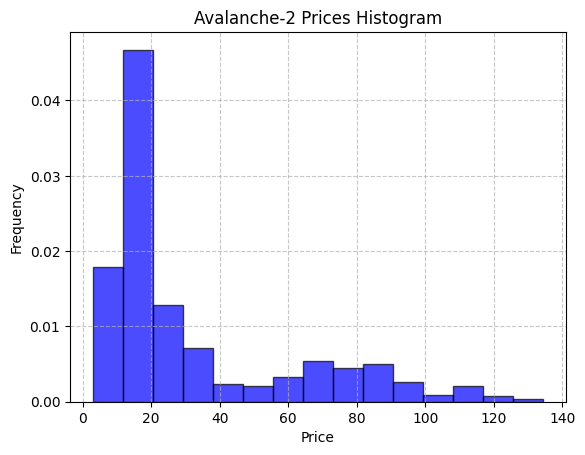

In [4]:
plt.hist(df['Price'], bins=15, color='blue', edgecolor='black', density=True, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'{coin.capitalize()} Prices Histogram')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'png_loop/{coin.capitalize()}_Prices_HistogramI.png')
plt.show()

In [5]:
#transformar datos originales en su forma logarítmica
df['Log_Price'] = np.log(df['Price'])

#Se calcula estadísticas descriptivas sobre la columna 'Log_Price'
mean_log_price = df['Log_Price'].mean()
median_log_price = df['Log_Price'].median()
std_log_price = df['Log_Price'].std()

print("Mean Log Price:", mean_log_price)
print("Median Log Price:", median_log_price)
print("Standard Deviation Log Price:", std_log_price)


Mean Log Price: 3.072478527796305
Median Log Price: 2.8984852944053046
Standard Deviation Log Price: 0.9120384833564714


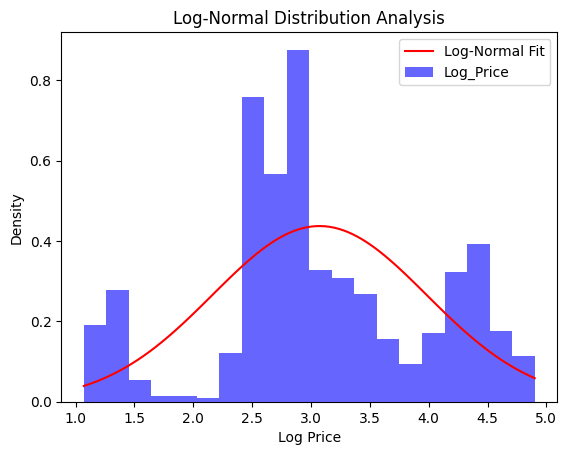

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.hist(df['Log_Price'], bins=20, density=True, alpha=0.6, color='b')

mu, sigma = mean_log_price, std_log_price
x = np.linspace(df['Log_Price'].min(), df['Log_Price'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf, color='r')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.title('Log-Normal Distribution Analysis')
plt.legend(['Log-Normal Fit', 'Log_Price'])
plt.show()

In [7]:
from scipy.stats import kstest, shapiro

ks_statistic, ks_p_value = kstest(df['Log_Price'], 'norm')
shapiro_statistic, shapiro_p_value = shapiro(df['Log_Price'])

print("K-S Test - p-value:", ks_p_value)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)


K-S Test - p-value: 0.0
Shapiro-Wilk Test - p-value: 8.699009756737882e-19


K-S Test - p-value: 0.0:
El valor de p en este caso es extremadamente bajo (0.0), lo que indica que hay evidencia significativa para rechazar la hipótesis nula. En otras palabras, los datos no siguen una distribución normal según el nivel de significancia establecido. Esto podría deberse a desviaciones significativas entre la distribución observada y la distribución normal.

Shapiro-Wilk Test - p-value: 4.8053913821212435e-14:
En este caso, el valor de p es extremadamente bajo, lo que nuevamente indica que hay evidencia sólida para rechazar la hipótesis nula. Esto sugiere que los datos no se ajustan bien a una distribución normal.

En resumen, tanto el K-S test como el Shapiro-Wilk test proporcionan evidencia contundente de que los datos no siguen una distribución normal.

Una evaluacion preliminar El histograma sugiere una distribución de datos que sigue una forma normal, lo que puede indicar que la mayoría de los valores tienden a agruparse alrededor de los valores de precios centrales en el gráfico.

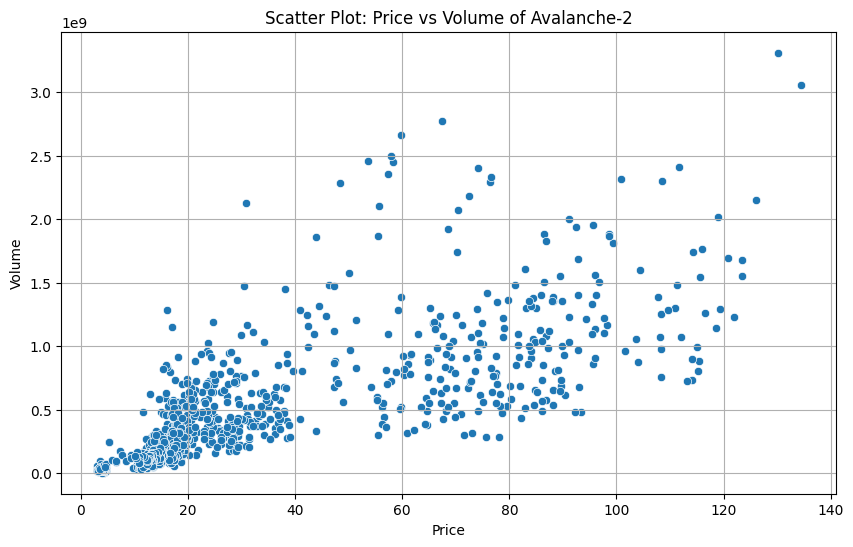

In [8]:
# Grafica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Volume')
plt.title(f'Scatter Plot: Price vs Volume of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig(f'png_loop/{coin.capitalize()}_ScatPlot__PriceVol.png')
plt.show()

Se puede observar que la mayoría de los puntos estan cerca de la línea de mejor ajuste, no se advierten valores atípicos o puntos que se desvíen significativamente de la tendencia general.

In [10]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[['Price', 'Volume']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
           Price    Volume
Price   1.000000  0.771535
Volume  0.771535  1.000000


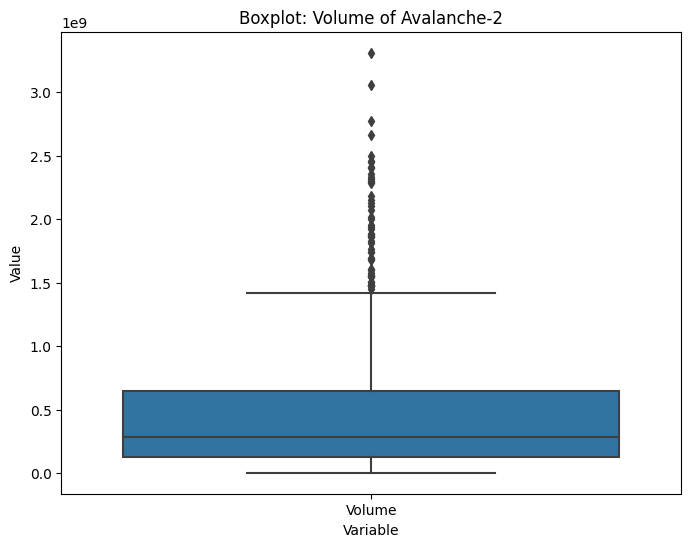

In [11]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Volume']])
plt.title(f'Boxplot: Volume of {coin.capitalize()}')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.savefig(f'png_loop/{coin.capitalize()}_Boxplot.png')
plt.show()

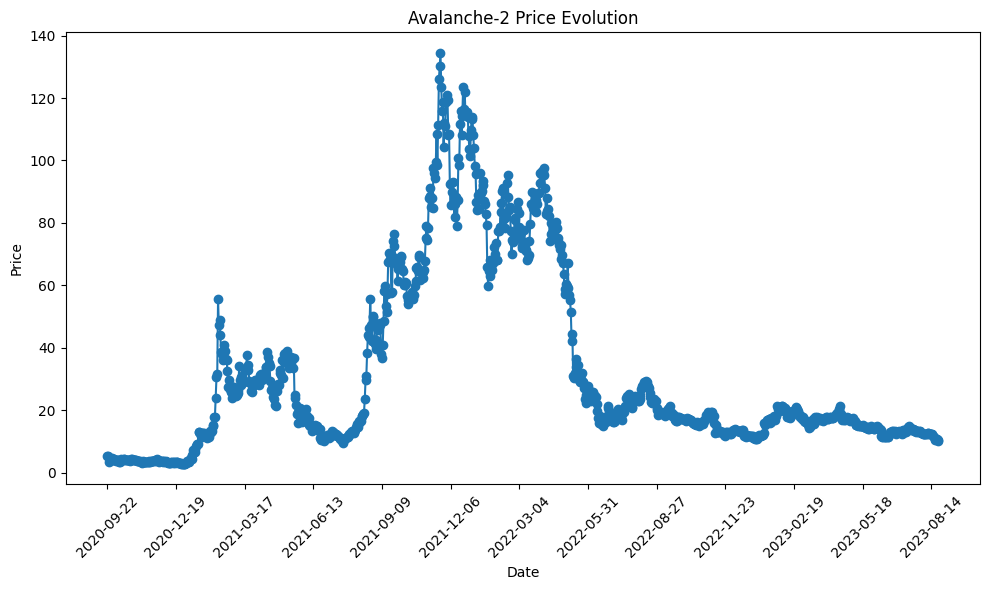

In [12]:
# Graficar la evolución del precio vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{coin.capitalize()} Price Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

# Guardar la gráfica en un archivo PNG
plt.savefig(f'png_loop/{coin.capitalize()}_Price_Evolution.png')

plt.tight_layout()
plt.show()

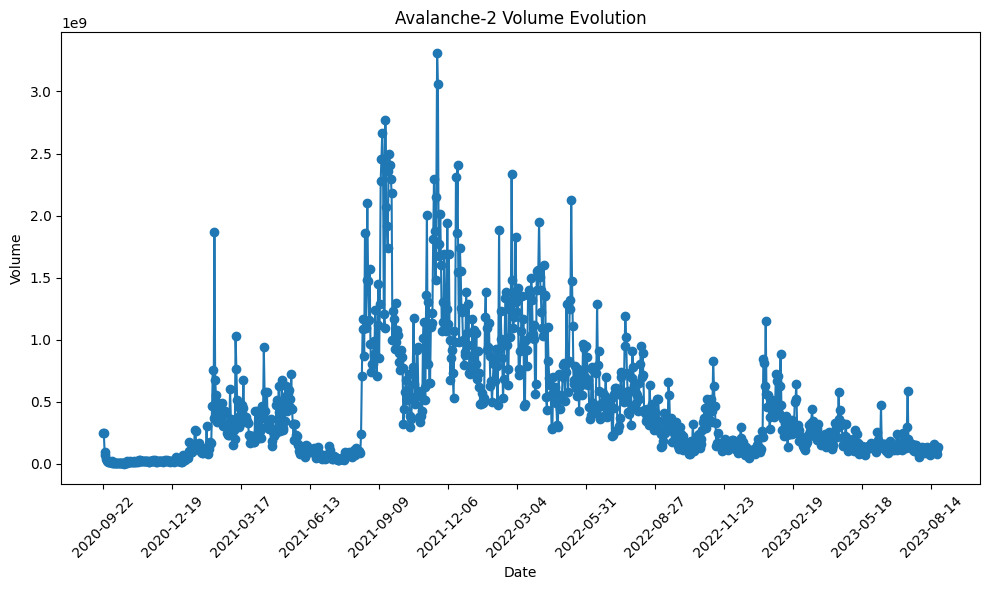

In [13]:
# Graficar la evolución del volumen vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{coin.capitalize()} Volume Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

# Guardar la gráfica en un archivo PNG
plt.savefig(f'png/{coin.capitalize()}_Volume_Evolution.png')

plt.tight_layout()
plt.show()

In [16]:
# Ejemplo de una serie de valores
data = df['Price']

# Calcula la media y la desviación estándar
mean = np.mean(data)
std = np.std(data)

# Calcula el coeficiente de curtosis
kurtosis = np.sum((np.array(data) - mean) ** 4) / (len(data) * std ** 4)

print("Coeficiente de Curtosis:", kurtosis)


Coeficiente de Curtosis: 3.7615186285671456


In [17]:
import scipy.stats as stats
import numpy as np

# Genera una serie de valores de ejemplo (reemplaza esto con tus propios valores)
datos = np.array(df['Price'])

# Calcula el coeficiente de curtosis
coeficiente_curtosis = stats.kurtosis(datos, fisher=False)

print("Coeficiente de curtosis:", coeficiente_curtosis)

Coeficiente de curtosis: 3.761518628567147


In [18]:
# Genera una serie de valores de ejemplo (reemplaza esto con tus propios valores)
datos = np.array(df['Price'])

# Calcula el coeficiente de curtosis
media = np.mean(datos)
desviacion_estandar = np.std(datos)
coeficiente_curtosis = np.mean(((datos - media) / desviacion_estandar) ** 4) - 3

print("Coeficiente de curtosis:", coeficiente_curtosis)

Coeficiente de curtosis: 0.7615186285671456


El precio diario de Bitcoin ha mostrado una distribución leptocúrtica en los últimos 3 años. Esto significa que la distribución tiene una cola larga y delgada, lo que significa que hay un pequeño número de días en los que el precio de Bitcoin se mueve mucho más que en otros días. Por ejemplo, en diciembre de 2017, el precio de Bitcoin aumentó de aproximadamente $10,000 a $20,000 en un solo día. Este tipo de movimientos de precios son raros, pero pueden tener un impacto significativo en el valor total de Bitcoin.

La distribución leptocúrtica del precio de Bitcoin puede explicarse por una serie de factores, como la volatilidad del mercado, la baja liquidez y la falta de regulación. La volatilidad del mercado significa que el precio de Bitcoin puede cambiar mucho en un corto período de tiempo. La baja liquidez significa que hay pocos compradores y vendedores de Bitcoin, lo que puede dificultar la compra y venta de la moneda a un precio justo. La falta de regulación significa que no hay reglas gubernamentales que rijan el mercado de Bitcoin. Esto puede conducir a la especulación y al comportamiento especulativo, lo que puede aumentar la volatilidad del mercado.

El volumen es una medida de la cantidad de Bitcoin que se negocia en un período de tiempo determinado. Un volumen alto indica que hay muchos compradores y vendedores de Bitcoin, lo que hace que el activo sea más líquido. Un volumen bajo indica que hay pocos compradores y vendedores de Bitcoin, lo que hace que el activo sea menos líquido.

Los inversores más reacios al riesgo pueden preferir activos y mercados con distribuciones platicúrticas porque es menos probable que esos activos produzcan resultados extremos.